In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
max_scores = {"Cell Cycle Transcription by Coupled CDK and Network Oscillators": 90,
              "Metabolic Interactions in the Gut Microbiome": 120,
              "Mammalian Cell Cycle 2006": 100,
              "T-LGL Survival Network 2011 Reduced Network": 180,
              "IL-1 Signaling": 1180,
              "Glucose Repression Signaling 2009": 730,
              "Signaling in Macrophage Activation": 3200,
              "Influenza A Virus Replication Cycle": 1310,
              "ABA_GA_base_A": 505}

In [3]:
df_raw = pd.read_csv("keep_log.csv")
df_raw["max"] = df_raw["sample_model"].apply(lambda x: max_scores[x])

df_raw.head()

,sample_model,iter,pop,keep,mix,prob,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,Cell Cycle Transcription by Coupled CDK and Ne...,20,6,1,0,0.2,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,83.5,NaN,NaN,NaN,NaN,83.5,90
1,Cell Cycle Transcription by Coupled CDK and Ne...,20,6,1,0,0.2,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,86.0,90
2,Cell Cycle Transcription by Coupled CDK and Ne...,20,6,1,0,0.2,64.500,NaN,NaN,NaN,...,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,84.0,90
3,Cell Cycle Transcription by Coupled CDK and Ne...,20,6,1,0,0.2,20.000,NaN,NaN,NaN,...,NaN,NaN,NaN,82.5,NaN,NaN,NaN,NaN,82.5,90
4,Cell Cycle Transcription by Coupled CDK and Ne...,20,6,1,0,0.2,25.125,NaN,NaN,NaN,...,NaN,NaN,NaN,84.5,NaN,NaN,NaN,NaN,84.5,90


In [4]:
df_per = df_raw.groupby(["sample_model", "keep"]).mean().reset_index()
df_per.iloc[:,6:] = df_per.iloc[:,6:].div(df_per["max"], axis=0)

df_per.head()

,sample_model,keep,iter,pop,mix,prob,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,ABA_GA_base_A,1,20.0,6.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.678202,NaN,NaN,NaN,NaN,0.679495,1.0
1,ABA_GA_base_A,2,20.0,7.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.677616,NaN,NaN,NaN,NaN,0.678345,1.0
2,ABA_GA_base_A,3,20.0,8.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.669983,NaN,NaN,NaN,NaN,0.670696,1.0
3,ABA_GA_base_A,4,20.0,9.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.672900,NaN,NaN,NaN,NaN,0.673979,1.0
4,ABA_GA_base_A,5,20.0,10.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.672828,NaN,NaN,NaN,NaN,0.675393,1.0


In [5]:
sample_models = ["Cell Cycle Transcription by Coupled CDK and Network Oscillators",
                 "Metabolic Interactions in the Gut Microbiome",
                 "Mammalian Cell Cycle 2006",
                 "T-LGL Survival Network 2011 Reduced Network",
                 "IL-1 Signaling",
                 "Glucose Repression Signaling 2009",
                 "Signaling in Macrophage Activation",
                 "Influenza A Virus Replication Cycle"]

samples = df_per.loc[df_per["sample_model"].isin(sample_models)]
aba = df_per.loc[df_per["sample_model"] == "ABA_GA_base_A"]

In [6]:
samples_iter = samples.drop(columns="sample_model").groupby("keep").mean().reset_index()
samples_iter.interpolate(axis=1, inplace=True)
samples_iter

,keep,iter,pop,mix,prob,0,1,2,3,4,...,92,93,94,95,96,97,98,99,100,max
0,1.0,20.0,6.0,0.0,0.2,0.412975,0.445269,0.477563,0.509857,0.542151,...,0.841819,0.842498,0.843176,0.843855,0.844834,0.845813,0.846792,0.847770,0.848749,1.0
1,2.0,20.0,7.0,0.0,0.2,0.412975,0.445415,0.477854,0.510293,0.542732,...,0.845280,0.845778,0.846276,0.846774,0.847389,0.848003,0.848618,0.849233,0.849847,1.0
2,3.0,20.0,8.0,0.0,0.2,0.412975,0.445094,0.477212,0.509331,0.541449,...,0.844233,0.844856,0.845479,0.846103,0.846618,0.847133,0.847649,0.848164,0.848679,1.0
3,4.0,20.0,9.0,0.0,0.2,0.412975,0.447079,0.481182,0.515285,0.549388,...,0.847622,0.847987,0.848352,0.848718,0.849414,0.850111,0.850808,0.851505,0.852201,1.0
4,5.0,20.0,10.0,0.0,0.2,0.412975,0.448497,0.484018,0.519540,0.555061,...,0.839961,0.840541,0.841122,0.841702,0.842177,0.842651,0.843126,0.843600,0.844074,1.0
5,10.0,20.0,15.0,0.0,0.2,0.412975,0.448184,0.483392,0.518601,0.553809,...,0.823547,0.824035,0.824523,0.825011,0.825611,0.826212,0.826812,0.827412,0.828012,1.0
6,15.0,20.0,20.0,0.0,0.2,0.412975,0.446438,0.479901,0.513364,0.546827,...,0.820575,0.821270,0.821965,0.822660,0.823138,0.823617,0.824095,0.824574,0.825052,1.0


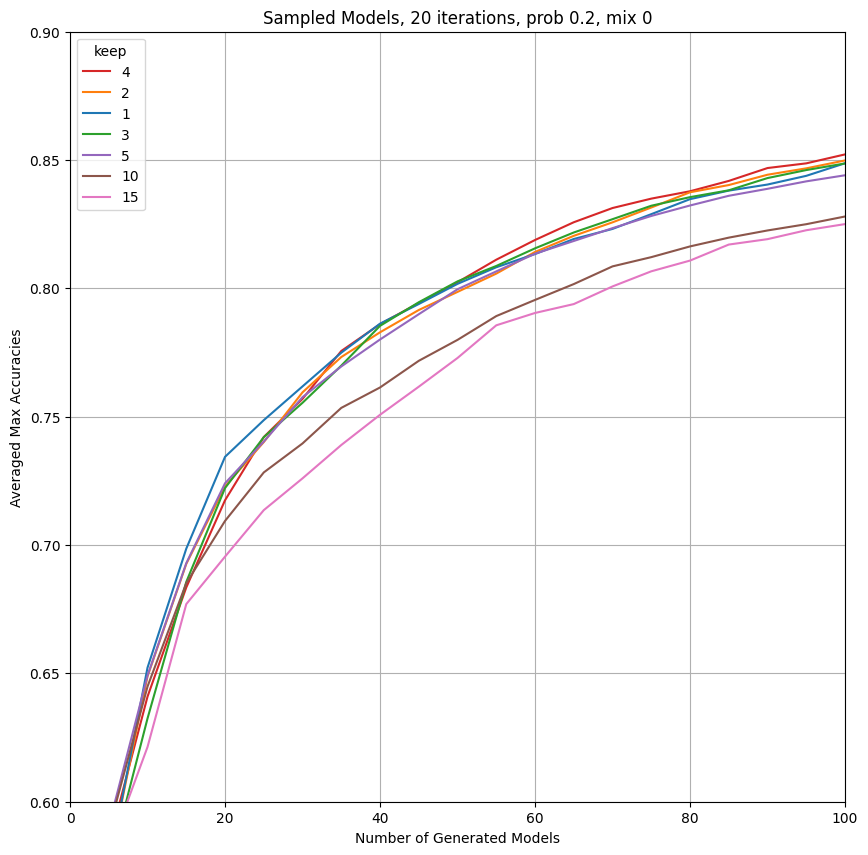

In [7]:
fig, ax1= plt.subplots(1,figsize=(10,10))
# set up
ax1.plot(range(101), samples_iter.iloc[3,5:106], label="4", color = "C3")
ax1.plot(range(101), samples_iter.iloc[1,5:106], label="2", color = "C1")
ax1.plot(range(101), samples_iter.iloc[0,5:106], label="1", color = "C0")
ax1.plot(range(101), samples_iter.iloc[2,5:106], label="3", color = "C2")
ax1.plot(range(101), samples_iter.iloc[4,5:106], label="5", color = "C4")
ax1.plot(range(101), samples_iter.iloc[5,5:106], label="10", color = "C5")
ax1.plot(range(101), samples_iter.iloc[6,5:106], label="15", color = "C6")

ax1.legend(title="keep", loc="upper left")
ax1.grid()
ax1.set_xlim(0, 100)
ax1.set_ylim(0.6, 0.9)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("Sampled Models, 20 iterations, prob 0.2, mix 0")

plt.show()

In [8]:
aba_iter = aba.drop(columns="sample_model").groupby("keep").mean().reset_index()
aba_iter.interpolate(axis=1, inplace=True)
aba_iter

,keep,iter,pop,mix,prob,0,1,2,3,4,...,92,93,94,95,96,97,98,99,100,max
0,1.0,20.0,6.0,0.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.676383,0.676990,0.677596,0.678202,0.678461,0.678719,0.678978,0.679236,0.679495,1.0
1,2.0,20.0,7.0,0.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.675291,0.676066,0.676841,0.677616,0.677762,0.677908,0.678053,0.678199,0.678345,1.0
2,3.0,20.0,8.0,0.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.667976,0.668645,0.669314,0.669983,0.670126,0.670268,0.670411,0.670553,0.670696,1.0
3,4.0,20.0,9.0,0.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.670732,0.671455,0.672177,0.672900,0.673116,0.673332,0.673547,0.673763,0.673979,1.0
4,5.0,20.0,10.0,0.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.672026,0.672293,0.672561,0.672828,0.673341,0.673854,0.674367,0.674880,0.675393,1.0
5,10.0,20.0,15.0,0.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.657957,0.658335,0.658713,0.659092,0.659885,0.660678,0.661471,0.662264,0.663057,1.0
6,15.0,20.0,20.0,0.0,0.01,0.617254,0.618184,0.619114,0.620045,0.620975,...,0.658473,0.658799,0.659125,0.659451,0.659567,0.659683,0.659800,0.659916,0.660032,1.0


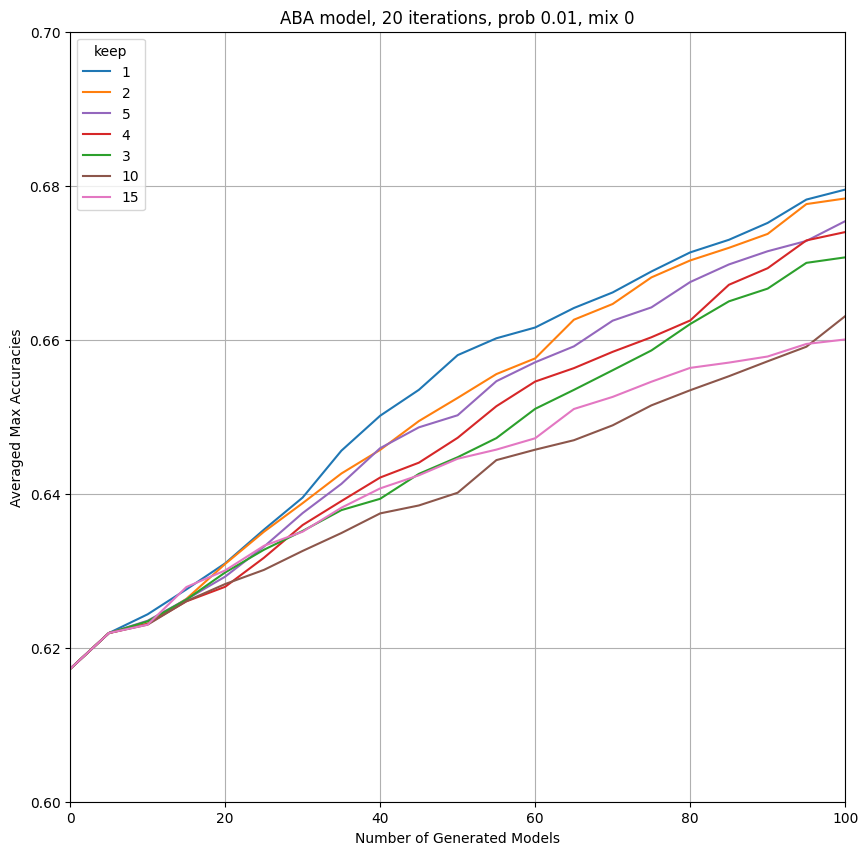

In [9]:
fig, ax1= plt.subplots(1,figsize=(10,10))
# set up
ax1.plot(range(101), aba_iter.iloc[0,5:106], label="1", color = "C0")
ax1.plot(range(101), aba_iter.iloc[1,5:106], label="2", color = "C1")
ax1.plot(range(101), aba_iter.iloc[4,5:106], label="5", color = "C4")
ax1.plot(range(101), aba_iter.iloc[3,5:106], label="4", color = "C3")
ax1.plot(range(101), aba_iter.iloc[2,5:106], label="3", color = "C2")
ax1.plot(range(101), aba_iter.iloc[5,5:106], label="10", color = "C5")
ax1.plot(range(101), aba_iter.iloc[6,5:106], label="15", color = "C6")

ax1.legend(title="keep", loc="upper left")
ax1.grid()
ax1.set_xlim(00, 100)
ax1.set_ylim(0.6, 0.7)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("ABA model, 20 iterations, prob 0.01, mix 0")

plt.show()